In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import MSD as msd

## Advanced Chemistry Practical Tutorial: Mean Squared Displacements

Now that you understand how MD works, it is important to learn what we can actually use it for. Molecular dynamics is a fantastic tool to study the motion of the atoms in materials. Molecules in liquds, gases and solids do not stay in the same place and move constantly. Think about a drop of dye in a glass of water, as time passes the dye distributes throughout the water. This process is called diffusion and is common throughout nature.  

Using the dye as an example, the motion of a dye molecule is not simple. As it moves it is jostled by collisions with other molecules, preventing it from moving in a straight path. If the path is examined in close detail, it will be seen to be a good approximation to a random walk. In mathmatics a random walk is a series of steps, each taken in a random direction. This was analysed by Albert Einstein in a study of Brownian motion and he showed that the mean square of the distance travelled by a particle following a random walk is proportional to the time elapsed. 
\begin{align}
\Big \langle r^2 \big \rangle & = 6 D_t + C 
\end{align}

where $\Big \langle r^2 \big \rangle$ is the mean squared distance, t is time, D is the diffusion rate and C is a constant. 

### What is the mean squared displacement

Going back to the example of the dye in water, lets assume for the sake of simplicity that we are in one dimension. Each step can either be forwards or backwards and we cannot predict which. From a given starting position, what distance is our dye molecule likely to travel after 1000 steps? This can be determined simply by adding together the steps, taking into account the fact that steps backwards subtract from the total, while steps forward add to the total. Since both forward and backward steps are equally probable, we come to the surprising conclusion that the probable distance travelled sums up to zero.

By adding the square of the distance we will always be adding positive numbers to our total which now increases linearly with time. Based upon equation 1 it should now be clear that a plot of $\Big \langle r^2 \big \rangle$ vs time with produce a line, the gradient of which is equal to 6D. Giving us direct access to the diffusion coefficient of the system. 

Lets try explore this with an example. Run a short DL_POLY simulation on the input files provided. 

You will a small MSD program called MSD.py to analyse your simulation results. First you need to read in the data, the HISTORY file contains a list of the atomic coordiantes held by the atoms during the simulation. 

In [2]:
# Read in the HISTORY file
data = msd.read_history("HISTORY", "F")

data is a dictionary variable containing the atomic trajectories, lattice vectors, total number of atoms, and total number of timesteps. 

data = {'trajectories':trajectories, 'lv':lv, 'timesteps':timesteps, 'natoms':natoms}

The next step is to calculate the MSD. 

In [3]:
# Run the MSD calculation
msd_data = msd.run_msd(data)

run_msd returns a dictionary containing the total MSD, the dimensional MSD values and the time. 
msd_data = {'msd': msd, 'xmsd': xmsd, 'ymsd': ymsd, 'zmsd': zmsd, 'time': time}

This can then be plotted to give a nice linear relationship. 

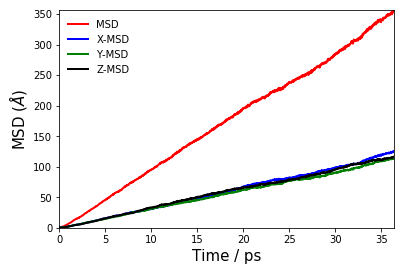

In [4]:
plt.plot(msd_data['time'], msd_data['msd'], lw=2, color="red", label="MSD")
plt.plot(msd_data['time'], msd_data['xmsd'], lw=2, color="blue", label="X-MSD")
plt.plot(msd_data['time'], msd_data['ymsd'], lw=2, color="green", label="Y-MSD")
plt.plot(msd_data['time'], msd_data['zmsd'], lw=2, color="black", label="Z-MSD")

plt.ylabel("MSD (" r'$\AA$' ")", fontsize=15)
plt.xlabel("Time / ps", fontsize=15)
plt.ylim(0, np.amax(msd_data['msd']))
plt.xlim(0, np.amax(msd_data['time']))
plt.legend(loc=2, frameon=False)
plt.show()

To calculate the gradient we need to perform a linear regression on the data. 

In [5]:
d, dintercept, dr_value, dp_value, dstd_err = stats.linregress(msd_data['time'], msd_data['msd'])

The gradient is equal to 6D (6 = dimensionality). So our final diffusion coefficient for the simulation is given by

In [6]:
diffusion_coefficient = (np.average(d) / 6) 
print("Diffusion Coefficient: ", diffusion_coefficient, " X 10 ^-9 (m^-2)")

Diffusion Coefficient:  1.60607578934  X 10 ^-9 (m^-2)
